# Group one: Anomoly Detection Project 

By: Brad Gauvin, Glady Barrios, Kevin Smith 

August, 25, 2022

Kalpana Cohort

#### Important Libraries 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import env
import prep
import breakdown

## Project Description 

We have put this notebook to answer the following email:

Email to analyst:


#### Hello,


#### I have some questions for you that I need answered before the board meeting Thursday afternoon. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?


----

## Project Goal 

Our project goal is to answer at least five of the questions asked in this email before our deadline so that our representive will have this data avalible in a timely manner. 

---

## Executive Summary 

#### _1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?_


Overall Javascript- i is the most visited lesson

- By program:*
- Data Science: Fundamentals
- Front-End(no longer offered): Content
- Full stack (Java): Javascript- i
- Full stack (PhP): content 

#### _2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?_

Each program generally looks at different lesson sets.

Thus, it's helpful to answer this question by program.
- Data Science Cohort Darden accessed Classification, SQL, and Fundamentals Significantly more than other Cohorts
- Full Stack(Java) cohort Cerves accessed javascript-i more, but not significantly more visually.
- Full Stack (PHP) cohort Kings accessed content more than other cohorts, but lassen accessed index.html more than any other cohort

#### _3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?_

For this question we assummed that "active students" means students who are currenly students and not "alumni".
This is an exploration of the students who only access the curriculm less than 10 times 

 - Students who access the curriculum less than 10 times are all from Full Stack - Java Script
 - These are students in cohorts: Voyageurs, Andromeda, Europa, Ganymede, Hyperion, Jupiter, Marco, Neptune and Oberon.
 - These two cohorts with the largest ammount of students that do not visit the curriculum as often are Andromeda and Hyperion 

#### _4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?_

`The short answer is yes to both.`

First our breakdown function calculates the percentage of all the endpoints available that each user_id has accessed. The average user accesses 10% of the sites. So, we set the bar for suspiscous activity at double the average; meaning that any user that has accessed more than 20% of the endpoints is flagged as suspiscious.

The second way we define suspiscious activity is if the user is missing a cohort_id. This could be an input error, or it could be something nefarious. Either way, further exploration of these user_ids is warranted.

The final way we define suspiscious activity is the number of different ip addresses that the user is associated with. The average user is associated with 10 different ip addresses. So, for the sake of simplicity we set the bar for suspiscious at double the average, and anyone who has accessed the site from more than 20 ip addresses is flagged as suspiscious for further investigation.

#### _5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?_

`In short, yes it is still happening, and yes it happened before.`

A look into user number 11 shows that there is evidence of the user accessing endpoints that belong to a curriculum that this user did not pay for as recently as 2021. The large spikes in activity coupled with the fact that many of the data science endpoints have only been accessed once suggests that there is webscraping going on. however, further data is needed to be certain of the type of activity that is happening. They could have paid for the course, but not been reclassified as a data science student. Without access to payment records, and more time.


#### _6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?_
- `Full Stack Java`- spring, javascript-i, html-css, mysql
- `Full Stack PHP` - Content, javascript-i, html -css, spring
- `Data science`- classification, fundimentals, sql, python

#### _7. Which lessons are least accessed?_

-Overall the least accessed lesson is examples (behind searches and table of contents)

By program the least accessed lessons are:
- Data Science: classification
- Front-End(no longer offered): Classification
- Full stack (Java): Javascript and Classification/Slides
- Full stack (PhP): Fundamentals and SQL


----

# Aquire and Prepare

Aquire

In [2]:
df=prep.acquire()

Prepare

In [3]:
df = prep.prepare_data(df)

In [4]:
# Split end point into pages and subpages (query)
df['endpoint']=df['endpoint'].astype(str)
df = pd.concat([df,  df.endpoint.apply(prep.parse_request)], axis=1)

In [5]:
df.head(3)

,endpoint,user_id,cohort_id,ip,cohort,slack,start_date,end_date,created_at,updated_at,program_id,program,role,alumni,page,query
datetime,,,,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full Stack PHP,student,alumn,,
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full Stack PHP,student,alumn,java-ii,
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full Stack PHP,student,alumn,java-ii,object-oriented-programming


------

# Question 1 & 2 & 6 & 7

### 1.Which lesson appears to attract the most traffic consistently across cohorts (per program)?

- Overall Javascript- i is the most visited lesson
<br>
<br>
**- By program:**
<br>
     - Data Science: Fundamentals
     <br>
     - Front-End(no longer offered): Content
     <br>
     - Full stack (Java): Javascript- i
     <br>
     - Full stack (PhP): content

_*for visualization please look at tableau chart below_ 

### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

Each program generally looks at different lesson sets. 
- Thus, it's helpful to answer this question by program.
- Data Science Cohort Darden accessed Classification, SQL, and Fundamentals Significantly more than other Cohorts
- Full Stack(Java) cohort Cerves accessed javascript-i more, but not significantly more visually.
- Full Stack (PHP) cohort Kings accessed content more than other cohorts, but lassen accessed index.html more than any other cohort

_*for visualization please look at tableau chart below_ 



### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

After graduation these are the programs that are mostly viseted by the three diffrent programs

- `Full Stack Java`- spring, javascript-i, html-css, mysql
- `Full Stack PHP` - Content, javascript-i, html -css, spring
- `Data science`- classification, fundimentals, sql, python


_*Visualization Guidance: please click on dashboard 2 to see the visualizations_



### 7. Which lessons are least accessed?

-Overall the least accessed lesson is examples (behind searches and table of contents)

By program the least accessed lessons are:
- Data Science: classification
- Front-End(no longer offered): Classification
- Full stack (Java): Javascript and Classification/Slides
- Full stack (PhP): Fundamentals and SQL

_*for visualization please look at tableau chart below_  

In [6]:
%%html
<div class='tableauPlaceholder' id='viz1661360022955' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Co&#47;CodeupLogs&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='CodeupLogs&#47;Dashboard1' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Co&#47;CodeupLogs&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1661360022955');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.minHeight='1800px';vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>


#### Image for github users
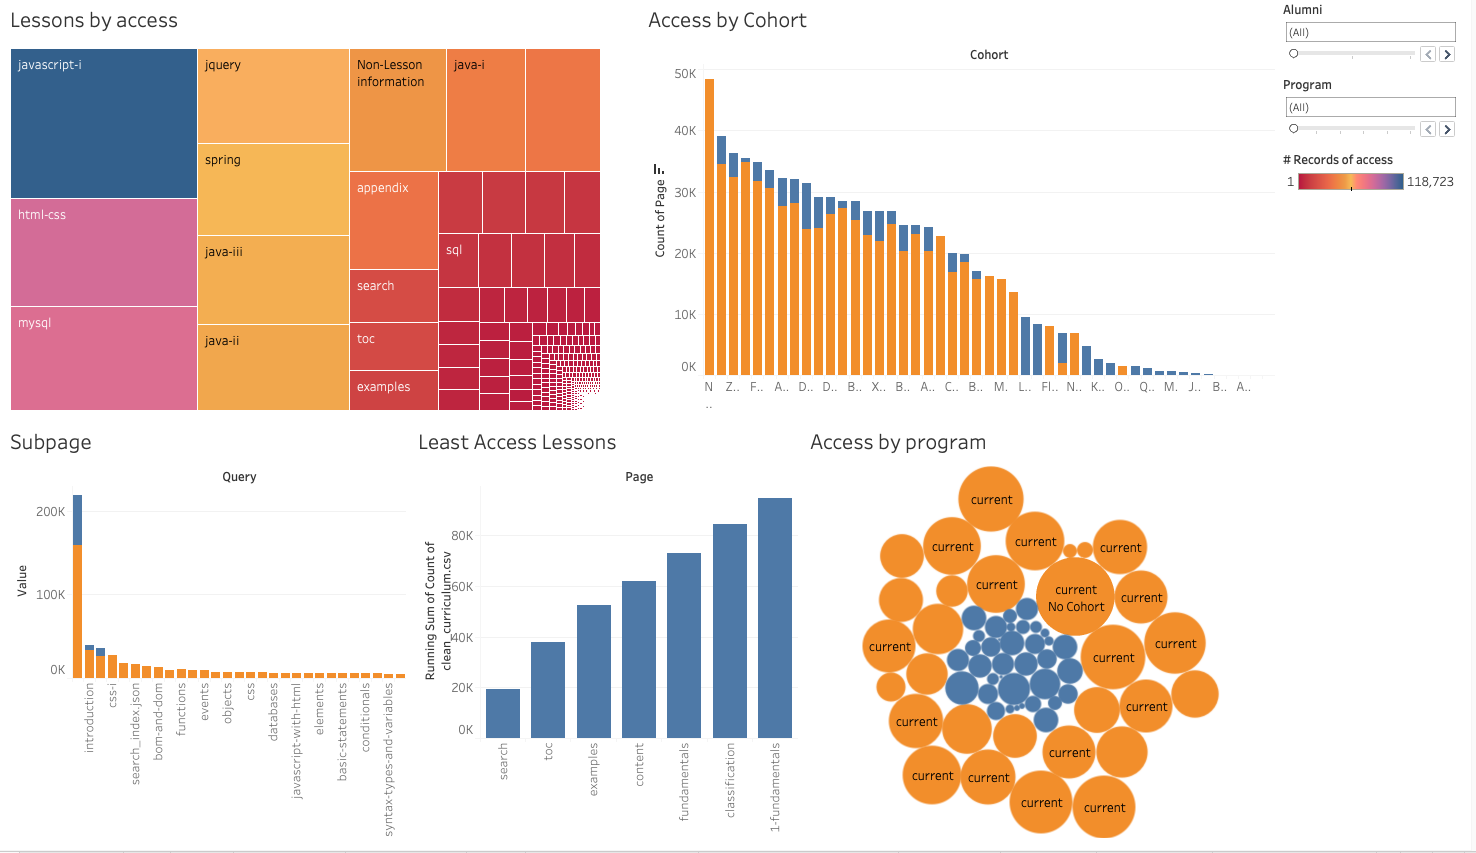

# Question 3 

### Are there students who, when active, hardly access the curriculum? 
### If so, what information do you have about these students? 


For this question we assummed that "active students" means students who are currenly students and not "alumni". This is an exploration of the students who only access the curriculm less than 10 times while currently being a student.


In [7]:
#starting by removing all the alumni and creating a new dataframe 
active_students_df = df.loc[df["alumni"] != 'alumn']


In [8]:
active_id = active_students_df.groupby(["user_id"])["user_id"].count()

- Ten is an arbituary number, we could have chosen any other number but we wanted to see the students who hardly view the curriculum 

In [9]:
#This is the list of students id's who are viewing the curriculum less than 10 times
less_active_id = active_students_df.groupby(["user_id"])["user_id"].count()[active_students_df.groupby(["user_id"])["user_id"].count()<10]
less_active_id

user_id
62     4
89     3
176    3
278    4
388    8
539    5
619    1
812    7
832    3
879    1
918    1
940    1
956    6
Name: user_id, dtype: int64

- There are 13 current students who view the curriculum less than ten times 

In [10]:
least_active_users_df = active_students_df[active_students_df.user_id.isin(less_active_id.index)]

<AxesSubplot:xlabel='user_id', ylabel='count'>

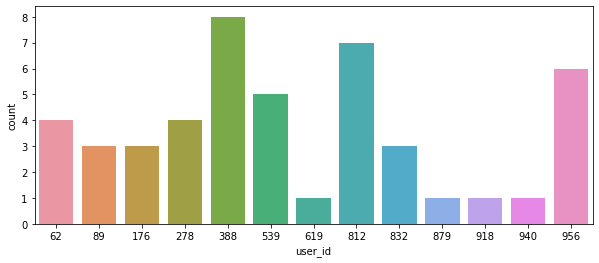

In [11]:
#these are the user Id's of the students that hardly view the curriculum 
plt.figure(figsize=(10,4))
sns.countplot(x = least_active_users_df['user_id'])

Text(0, 0.5, 'Count of Visits')

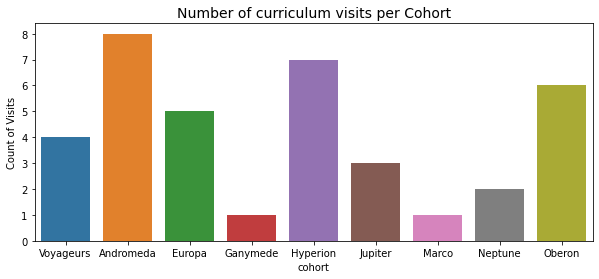

In [12]:
#These are all the cohorts that have students who view the curruculum less than 10 times
plt.figure(figsize=(10,4))
sns.countplot(x = least_active_users_df['cohort'])
plt.title('Number of curriculum visits per Cohort',size=14)
plt.ylabel('Count of Visits')

In [13]:
least_active_users_df.head(10)
#there are three students who only have 

,endpoint,user_id,cohort_id,ip,cohort,slack,start_date,end_date,created_at,updated_at,program_id,program,role,alumni,page,query
datetime,,,,,,,,,,,,,,,,
2018-01-29 13:08:55,/,62,NaN,70.123.209.40,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,,
2018-01-29 13:08:57,java-ii,62,NaN,70.123.209.40,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,java-ii,
2018-01-29 13:09:01,java-iii,62,NaN,70.123.209.40,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,java-iii,
2018-01-29 13:09:14,spring,62,NaN,70.123.209.40,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,spring,
2018-02-06 09:07:47,/,89,NaN,12.43.239.98,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,,
2018-02-06 09:07:55,java-i,89,NaN,12.43.239.98,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,java-i,
2018-02-06 09:08:02,java-i/introduction-to-java,89,NaN,12.43.239.98,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,java-i,introduction-to-java
2018-05-04 13:44:51,spring/fundamentals/relationships,176,NaN,108.220.103.204,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,spring,fundamentals
2018-05-04 13:44:58,/,176,NaN,108.220.103.204,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,,


### Answer & Recomendation 

 - There are 13 students who are all part of the `Full Stack - Java Script`who have viewd the curriculum less than ten times.
 
 - These are students in cohorts: 
  - Voyageurs 
  - Andromeda
  - Europa
  - Ganymede 
  - Hyperion
  - Jupiter
  - Marco
  - Neptune 
  - Oberon.
 - There are 3 users in this list with hardly any infromation, the only information is the ip address, user id, and endpoint
 
 - Looks like we need more help looking into these three ip's could be something suspicious or just students logging in from a diffrent computer 
     - 12.43.239.98   
       - from user_id 89
     - 108.220.103.204  
       - from user_id 176
     - 70.123.209.40   
       - from user_id 62

---

# Question 4 

### Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [ ]:
breakdown.breakdown(df)

The short answer is yes to both.

- First our breakdown function calculates the percentage of all the endpoints available that each user_id has accessed. The average user accesses 10% of the sites. So, we set the bar for suspiscous activity at double the average; meaning that any user that has accessed more than 20% of the endpoints is flagged as suspiscious.

- The second way we define suspiscious activity is if the user is missing a cohort_id. This could be an input error, or it could be something nefarious. Either way, further exploration of these user_ids is warranted.

- The final way we define suspiscious activity is the number of different ip addresses that the user is associated with. The average user is associated with 10 different ip addresses. So, for the sake of simplicity we set the bar for suspiscious at double the average, and anyone who has accessed the site from more than 20 ip addresses is flagged as suspiscious for further investigation.

Next the breakdown function prints out a display of the users average monthly activity over time, the program that they are associated with, and the first and last few endpoints accessed.

This will help us determine if they are potentially webscraping, and help us answer the next question.

---

# Question 5 

### At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?


In short, yes it is still happening, and yes it happened before.

A look into user number 11 shows that there is evidence of the user accessing endpoints that belong to a curriculum that this user did not pay for as recently as 2021. The large spikes in activity coupled with the fact that many of the data science endpoints have only been accessed once suggests that there is webscraping going on. however, further data is needed to be certain of the type of activity that is happening. They could have paid for the course, but not been reclassified as a data science student. Without access to payment records, and more time.

---

## Summary 

In summary questions 1 - 7 have been answered with specific research using Juypter Notebook and Tableau 

Question 1, 2, 6, 7 where answered using Tableau and analizing graphs and charts to answer these very specific questions for our representative and leaders.

Question 3 - was answered using jupyter notebook with the intention of only looking at students who are currently attending the course as well as students who are viewing the curriculm less than 10 times. 10 is a number that we picked since the question was asking about students who `hardly access` the curruculm. 

Question 4 & 5 - was answered using jupyter notebook and looking user access and user ip's.